# TASK 1-IRIS FLOWER CLASSIFICATION

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
# Load the dataset from the corrected GitHub URL
path = "https://raw.githubusercontent.com/preethiakshai/CBTC/main/Iris%20Flower%20-%20Iris.csv"
iris_data = pd.read_csv(path)
iris_data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
print("Number of Rows:",iris_data.shape[0])
print("Number of coloums:",iris_data.shape[1])


Number of Rows: 150
Number of coloums: 6


In [5]:
iris_data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
iris_data['Species'] = iris_data.Species.str.replace('Iris-','')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [7]:
# Find out the count of each species
print("\nClass distribution:")
print(iris_data['Species'].value_counts())


Class distribution:
Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [8]:
#check for null value
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Note: There is no null value

In [9]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## DATA VISUALISATION

In [10]:
#Drop unwanted columns
iris_data=iris_data.drop(columns="Id")

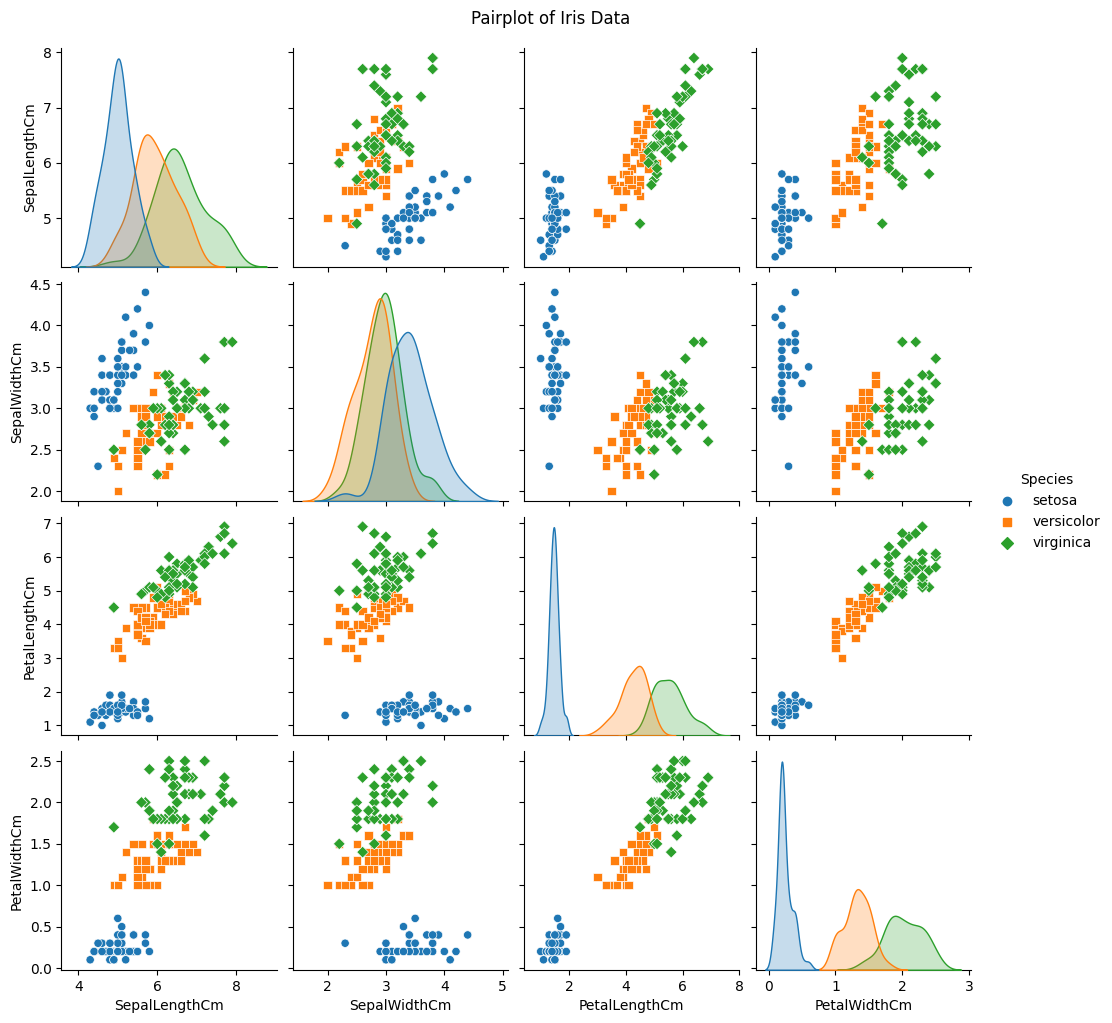

In [11]:
# Pairplot to visualize the relationships between features
sns.pairplot(iris_data, hue='Species', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Data", y=1.02)
plt.show()

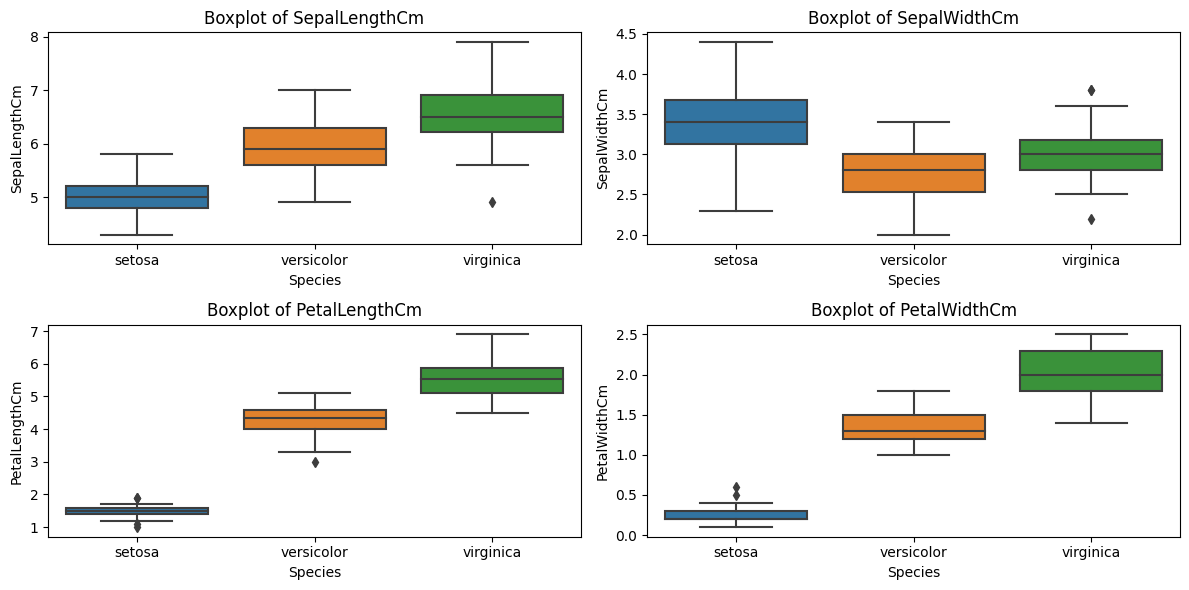

In [12]:

# Boxplot to show the distribution of features by species
plt.figure(figsize=(12, 6))
for column in iris_data.columns[:-1]:
    plt.subplot(2, 2, list(iris_data.columns).index(column) + 1)
    sns.boxplot(x='Species', y=column, data=iris_data)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

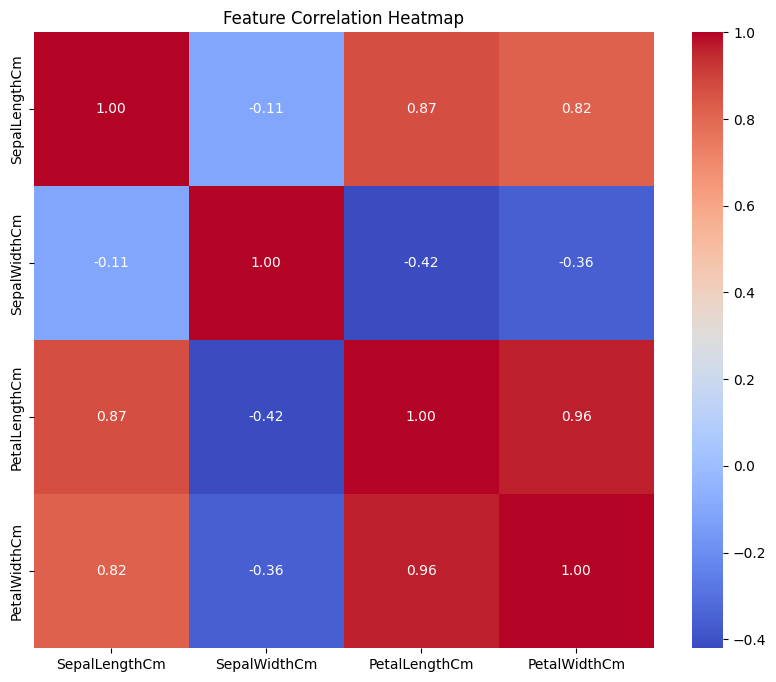

In [13]:
# Heatmap to show the correlation between features (drop the Species column)
plt.figure(figsize=(10, 8))
sns.heatmap(iris_data.drop(columns=['Species']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [14]:
# Outlayer Detection using IQR method
def find_outliers_iqr(df):
    outliers = pd.DataFrame()
    for col in df.columns:
        if df[col].dtype != 'object':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            outliers[col] = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
    return outliers

iqr_outliers = find_outliers_iqr(iris_data)

print("Outliers detected by IQR method:")
print(iqr_outliers.sum())


Outliers detected by IQR method:
SepalLengthCm    0
SepalWidthCm     4
PetalLengthCm    0
PetalWidthCm     0
dtype: int64


In [15]:
# Treating outliers by removing them
combined_outliers = iqr_outliers.any(axis=1)
iris_data_cleaned = iris_data[~combined_outliers]

print("\nData shape before removing outliers:", iris_data.shape)
print("Data shape after removing outliers:", iris_data_cleaned.shape)


Data shape before removing outliers: (150, 5)
Data shape after removing outliers: (146, 5)


Note:"SepalWidthCm" has 4 data points that fall outside the calculated lower and upper bounds, indicating they are outliers.

In [16]:
# Treating outliers by removing them
combined_outliers = iqr_outliers.any(axis=1)
iris_data_cleaned = iris_data[~combined_outliers]

In [17]:
# check for outlayer

def find_outliers_iqr(df):
    outliers = pd.DataFrame()
    for col in df.columns:
        if df[col].dtype != 'object':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            outliers[col] = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
    return outliers
iqr_outliers = find_outliers_iqr(iris_data)
print("Outliers detected by IQR method:")
print(iqr_outliers.sum())

Outliers detected by IQR method:
SepalLengthCm    0
SepalWidthCm     4
PetalLengthCm    0
PetalWidthCm     0
dtype: int64


In [18]:
# Treat outliers by replacing them with the mean
def replace_outliers_with_mean(df, outliers):
    for col in df.columns:
        if col in outliers:
            mean_value = df[col].mean()
            df[col] = np.where(outliers[col], mean_value, df[col])
    return df
iris_data_cleaned = replace_outliers_with_mean(iris_data.copy(), iqr_outliers)

print("\nData shape after replacing outliers:", iris_data_cleaned.shape)


Data shape after replacing outliers: (150, 5)


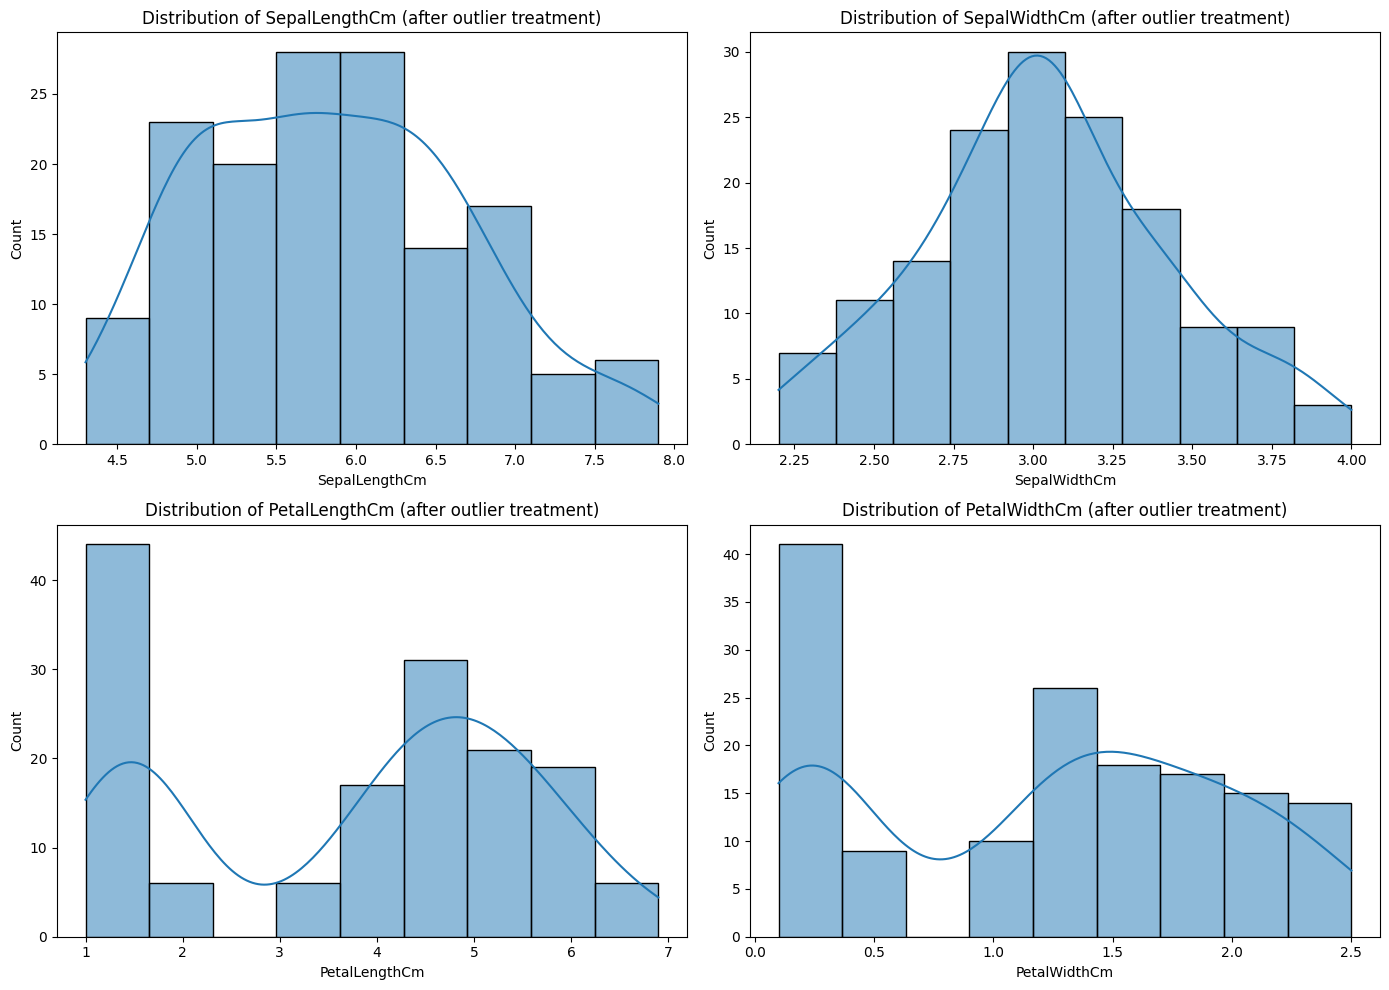

In [19]:
# Visualize the distributions of each feature after outlier treatment
plt.figure(figsize=(14, 10))
for i, column in enumerate(iris_data_cleaned.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(iris_data_cleaned[column], kde=True)
    plt.title(f'Distribution of {column} (after outlier treatment)')
plt.tight_layout()
plt.show()


In [20]:
# Encode the 'Species' column to numerical values using Label encoder
label_encoder = LabelEncoder()
iris_data_cleaned['Species'] = label_encoder.fit_transform(iris_data_cleaned['Species'])

In [21]:
# Separate features and target
X = iris_data_cleaned.drop(columns=['Species'])
y = iris_data_cleaned['Species']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Train the Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [26]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

In [27]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



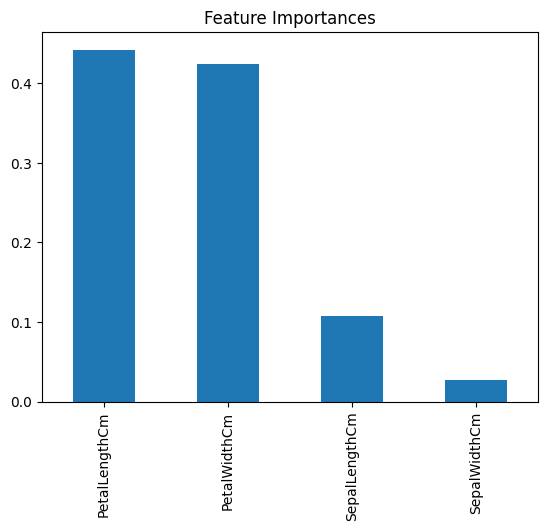

In [28]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances')
plt.show()

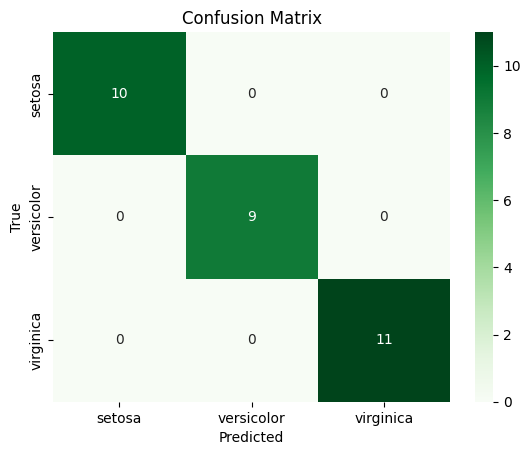

In [31]:
# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [33]:
# Function to predict species based on new inputs
def predict_species(new_values, model, label_encoder):
    new_values = np.array(new_values)
    predictions = model.predict(new_values)
    predicted_species = label_encoder.inverse_transform(predictions)
    return predicted_species


In [34]:
# Input new values from the user
def get_user_input():
    print("Please enter the following measurements:")
    sepal_length = float(input("Sepal Length (cm): "))
    sepal_width = float(input("Sepal Width (cm): "))
    petal_length = float(input("Petal Length (cm): "))
    petal_width = float(input("Petal Width (cm): "))
    return [[sepal_length, sepal_width, petal_length, petal_width]]


In [35]:
# Predict new values
X_new = get_user_input()
new_species = predict_species(X_new, model, label_encoder)
print("Prediction of Species for new inputs:", new_species)

Please enter the following measurements:
Sepal Length (cm): 4
Sepal Width (cm): 3.2
Petal Length (cm): 5
Petal Width (cm): 6
Prediction of Species for new inputs: ['virginica']


In [37]:
import pickle
# Save the model
with open('SVM.pickle', 'wb') as f:
    pickle.dump(model, f)

In [38]:
# Load the model
with open('SVM.pickle', 'rb') as f:
    loaded_model = pickle.load(f)



In [40]:
# Verify the loaded model by making predictions
loaded_model_species = predict_species(X_new, loaded_model, label_encoder)
print("Prediction of Species for new inputs using loaded model:", loaded_model_species)

Prediction of Species for new inputs using loaded model: ['virginica']
